

# Project: Investigate a Dataset - TMDb movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In current report we will handle a brief introduction to the dataset and answering some questions that could run in mind.

### Dataset Description 

I will be using TMDB movie dataset, This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


In [1]:
# import all packages we want
import numpy as np
import pandas as pd
import csv
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data needed

   Let's show our data to begin analyzing ...

In [2]:
# loading data from the csv file.
df_tmdb = pd.read_csv('tmdb-movies.csv')
# Printing the first three rows of the dataset
df_tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# checking statistics of the data
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# Having infomation on datatypes of columns and missing values.
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Calculate number of duplicated rows.
sum(df_tmdb.duplicated())

1


### Data Cleaning
> We need to clean the following :

> 1- remove columns such as 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'director', 'tagline', 'overview', 'production_companies', 'vote_count' and 'vote_average'.

> 2- Lets delete the one duplicated row that we have in our dataset.

> 3- There are lots of movies where the budget or revenue have a value of '0' which means that the values of those movies has not been recorded. So we need to discard this rows, since we cannot calculate profit of such movies

> 4- The 'release_date' column must be converted into date format.

> 5- Convert budget and revenue column to int datatype.

> 6- Replace runtime value of 0 to NAN, Since it will affect the result.

In [6]:
# release_date column needs to be datetime object instead of string.
df_tmdb['release_date'] = df_tmdb['release_date'].apply(lambda x: dt.datetime.strptime(x, "%m/%d/%y"))

In [7]:
# Showing column 'release_date' data.
df_tmdb['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [8]:
# Showing last data from column 'release_date'.
df_tmdb['release_date'].tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

In [9]:
# listing years for analyzation.
years = []
for _ in df_tmdb['release_date']:
    years.append(_.year)
print(list(set(years)))

[2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [10]:
# Have a list for changing wrong added 100 years.
d_100 = []
years = 100
days_per_year = 365.24

In [11]:
for d in df_tmdb['release_date']:
    if d.year >=2060:
        #shifting 100 years back
        tdelta = dt.timedelta(days = (years * days_per_year))
        # corrected date
        d-=tdelta
        d_100.append(d)
    else:
        #as it is
        d_100.append(d)

In [12]:
# Correcting years in 'release_date' column
df_tmdb['release_date'] = d_100

In [13]:
# Having a list of columns to be deleted
del_col=[ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview',
         'production_companies','tagline','director', 'vote_count', 'vote_average']

# Deleting the columns
df_tmdb.drop(del_col, axis=1, inplace=True)

# Testing the new dataset
df_tmdb.head(3)

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [14]:
# Store rows and columns using shape function.
rows, col = df_tmdb.shape

#since rows includes count of a header, we need to remove its count.
print('We have {} total rows and {} columns.'.format(rows-1, col))

We have 10865 total rows and 8 columns.


In [15]:
# Drop duplicate rows but keep the first one
df_tmdb.drop_duplicates(keep = 'first', inplace = True)

# Store rows and columns using shape function.
rows, col = df_tmdb.shape
print('Now we have {} total rows and {} columns.'.format(rows-1, col))

Now we have 10864 total rows and 8 columns.


In [16]:
# Columns that need to be checked.
columns = ['budget', 'revenue']

# Replace 0 with NAN
df_tmdb[columns] = df_tmdb[columns].replace(0, np.NaN)

# Drop rows which contains NAN
df_tmdb.dropna(subset = columns, inplace = True)
rows, col = df_tmdb.shape
print('We now have only {} rows.'.format(rows-1))

We now have only 3853 rows.


In [17]:
# Convert column release_date to DateTime
df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date'])

# Lets look at the new dataset
df_tmdb.head(3)

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [18]:
# Columns to convert datatype of
columns = ['budget', 'revenue']

# Convert budget and revenue column to int datatype
df_tmdb[columns] = df_tmdb[columns].applymap(np.int64)

# Lets look at the new datatype
df_tmdb.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [19]:
# Replace runtime value of 0 to NAN, Since it will affect the result.
df_tmdb['runtime'] = df_tmdb['runtime'].replace(0, np.NaN)

# Check the stats of dataset
df_tmdb.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [20]:
change_type=['budget', 'revenue']

#changing data type
df_tmdb[change_type]=df_tmdb[change_type].applymap(np.int64)

#printing the changed information
df_tmdb.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.


### Research Question 1 ( Which movie had a larger budgetm revenue or profit ?. )

In [21]:
# Read the variables
df_tmdb['profit'] = df_tmdb['revenue'] - df_tmdb['budget']

#previewing the changes in the dataset
df_tmdb.head(3)

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201


In [22]:
# Movie with highest profit
df_tmdb.loc[df_tmdb['profit'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [23]:
# Movie with lowest profit
df_tmdb.loc[df_tmdb['profit'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

In [24]:
# Movie with greatest runtime
df_tmdb.loc[df_tmdb['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
profit                                                    -17128721
Name: 2107, dtype: object

In [25]:
# Movie with least runtime
df_tmdb.loc[df_tmdb['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
profit                                                           -5
Name: 5162, dtype: object

In [26]:
# Average runtime of movies
df_tmdb['runtime'].mean()

109.22029060716139

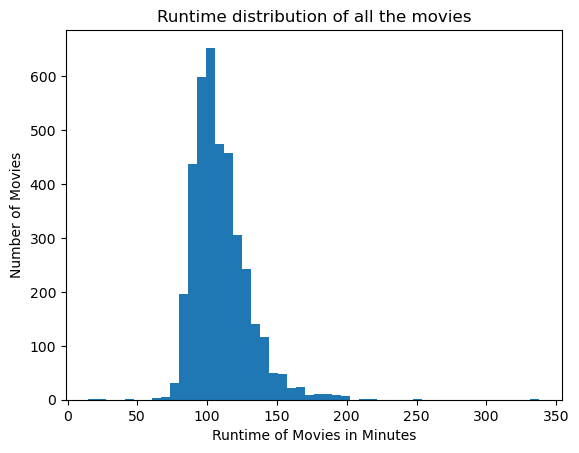

In [27]:
# Runtime of Movies
# x-axis
plt.xlabel('Runtime of Movies in Minutes')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Runtime distribution of all the movies')
# Plot a histogram
plt.hist(df_tmdb['runtime'], bins = 50);

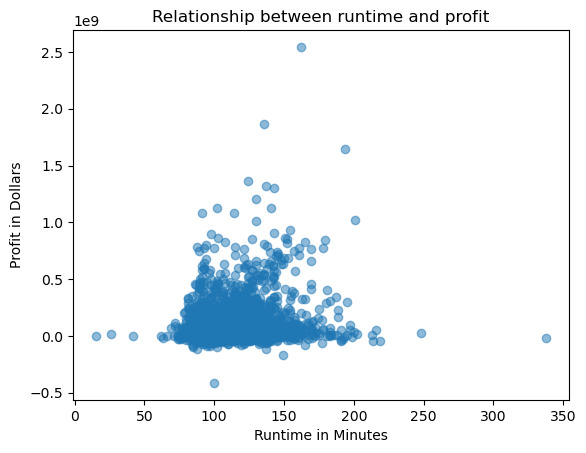

In [28]:
# Relationship between runtime and profit
# x-axis
plt.xlabel('Runtime in Minutes')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between runtime and profit')
plt.scatter(df_tmdb['runtime'], df_tmdb['profit'], alpha=0.5)
plt.show()

In [29]:
# Movie with highest budget
df_tmdb.loc[df_tmdb['budget'].idxmax()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
profit                                                   -413912431
Name: 2244, dtype: object

In [30]:
# Movie with lowest budget
df_tmdb.loc[df_tmdb['budget'].idxmin()]

budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
profit                                                           99
Name: 2618, dtype: object

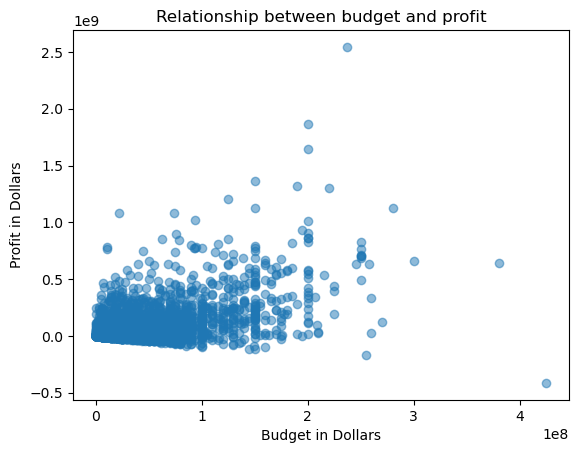

In [31]:
# Relationship between budget and profit
# x-axis
plt.xlabel('Budget in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between budget and profit')
plt.scatter(df_tmdb['budget'], df_tmdb['profit'], alpha=0.5)
plt.show()

In [32]:
# Movie with highest revenue
df_tmdb.loc[df_tmdb['revenue'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
profit                                                   2544505847
Name: 1386, dtype: object

In [33]:
# Movie with lowest revenue
df_tmdb.loc[df_tmdb['revenue'].idxmin()]

budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
profit                                                     -5999998
Name: 5067, dtype: object

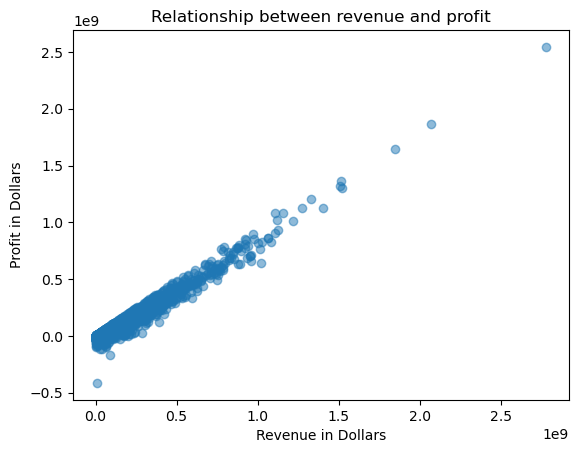

In [34]:
# Relationship between revenue and profit
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and profit')
plt.scatter(df_tmdb['revenue'], df_tmdb['profit'], alpha=0.5)
plt.show()

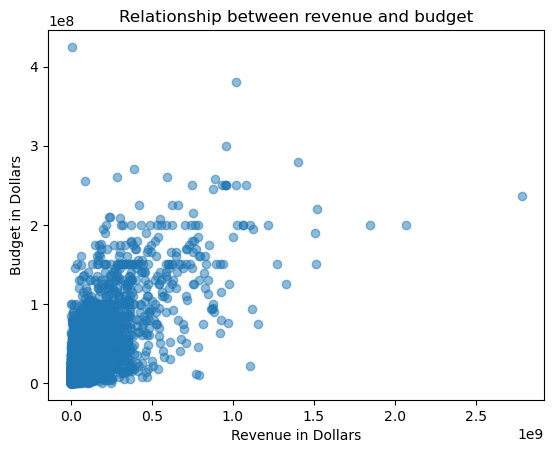

In [35]:
# Relationship between revenue and budget
# x-axis
plt.xlabel('Revenue in Dollars')
# y-axis
plt.ylabel('Budget in Dollars')
# Title of the histogram
plt.title('Relationship between revenue and budget')
plt.scatter(df_tmdb['revenue'], df_tmdb['budget'], alpha=0.5)
plt.show()

### Research Question 2  (which movies had higher profits ?)

In [36]:
# Dataframe which has data of movies which made profit of more the 25M Dollars.
tmdb_profit_data = df_tmdb[df_tmdb['profit'] >= 25000000]
# Reindexing the dataframe
tmdb_profit_data.index = range(len(tmdb_profit_data))
#showing the dataset
tmdb_profit_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [37]:
# Printing the info of the new dataframe
tmdb_profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          1791 non-null   int64         
 1   revenue         1791 non-null   int64         
 2   original_title  1791 non-null   object        
 3   cast            1790 non-null   object        
 4   runtime         1791 non-null   int64         
 5   genres          1791 non-null   object        
 6   release_date    1791 non-null   datetime64[ns]
 7   release_year    1791 non-null   int64         
 8   profit          1791 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 126.1+ KB


In [38]:
# Finfd the average budget of movies which made profit more then 25M Dollars
tmdb_profit_data['budget'].mean()

51870307.757118925

In [39]:
# Finfd the average revenue of movies which made profit more then 25M Dollars
tmdb_profit_data['revenue'].mean()

206359440.87269682

In [40]:
# Finfd the average runtime of movies which made profit more then 25M Dollars
tmdb_profit_data['runtime'].mean()

112.56672250139587

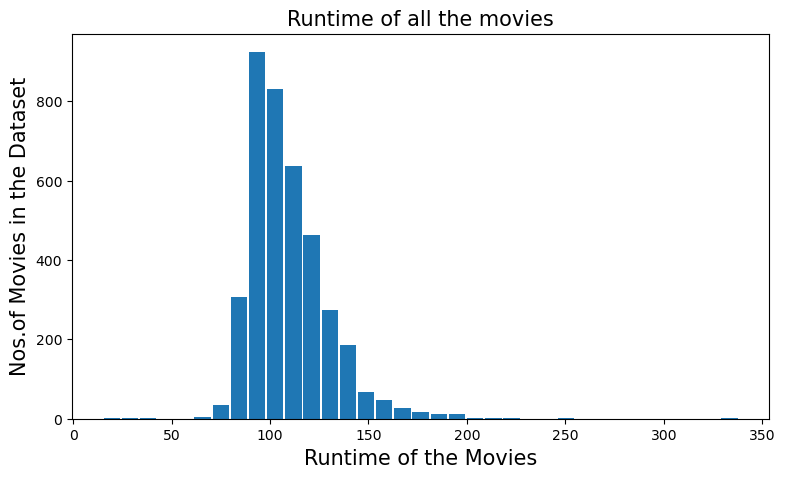

In [41]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df_tmdb['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

In [42]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
genres_count = pd.Series(tmdb_profit_data['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              688
Comedy             645
Action             566
Thriller           542
Adventure          451
Romance            292
Crime              287
Family             265
Science Fiction    250
Fantasy            227
Horror             191
Mystery            150
Animation          136
Music               62
History             59
War                 58
Western             20
Documentary          9
Foreign              1
TV Movie             1
dtype: int64

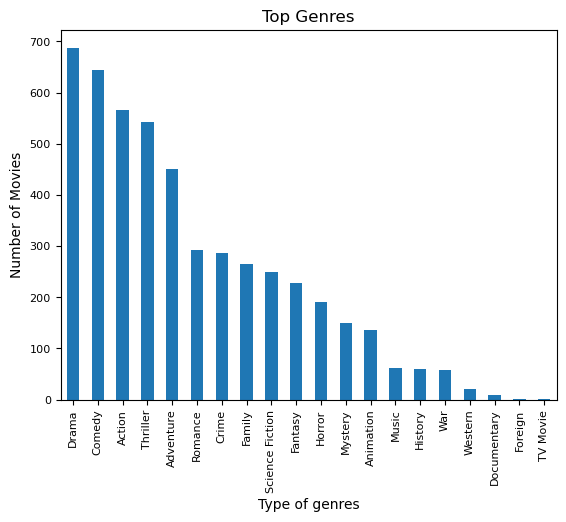

In [43]:
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 8)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()

In [44]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
cast_count = pd.Series(tmdb_profit_data['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Tom Cruise            29
Tom Hanks             28
Brad Pitt             27
Robert De Niro        26
Bruce Willis          25
Cameron Diaz          24
Samuel L. Jackson     23
Eddie Murphy          23
Mark Wahlberg         22
Sylvester Stallone    22
Johnny Depp           22
George Clooney        20
Jim Carrey            20
Robin Williams        20
Matt Damon            20
Harrison Ford         20
Adam Sandler          20
Denzel Washington     20
Ben Stiller           19
Owen Wilson           19
dtype: int64

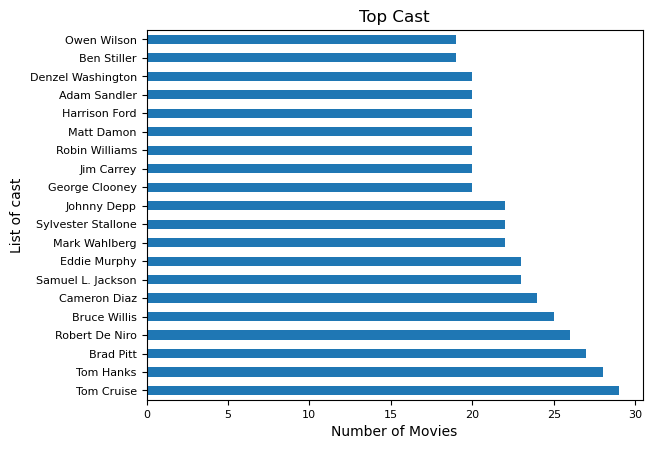

In [45]:
# Initialize the plot
diagram = cast_count.head(20).plot.barh(fontsize = 8)
# Set a title
diagram.set(title = 'Top Cast')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of cast')
# Show the plot
plt.show()

In [46]:
#counting the no.of rows in the new data base
len(tmdb_profit_data)

1791

In [47]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = tmdb_profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [48]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Drama        688
Comedy       645
Action       566
Thriller     542
Adventure    451
dtype: int64

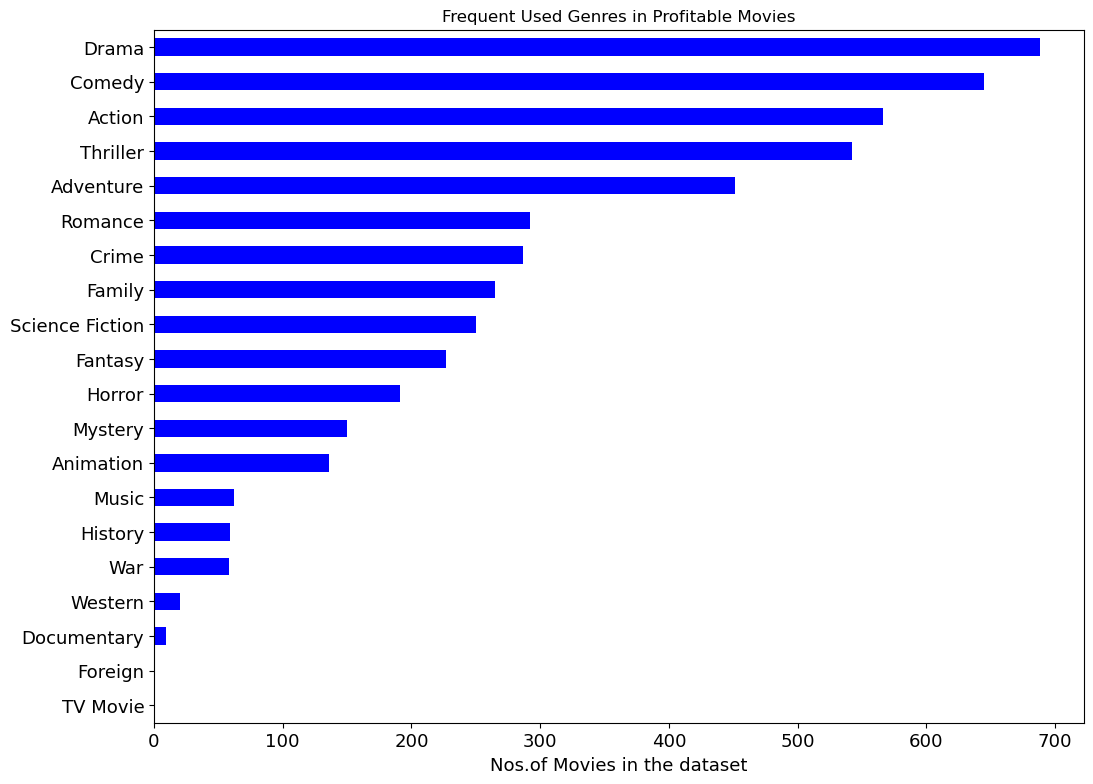

In [49]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#0000FF', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

In [50]:
#variable to store the retured value
count = data('cast')
#printing top 5 values
count.head()

Tom Cruise        29
Tom Hanks         28
Brad Pitt         27
Robert De Niro    26
Bruce Willis      25
dtype: int64

## Research Question 3 :

### What is the best movies based on genres with the most revenue, profit and popularity?

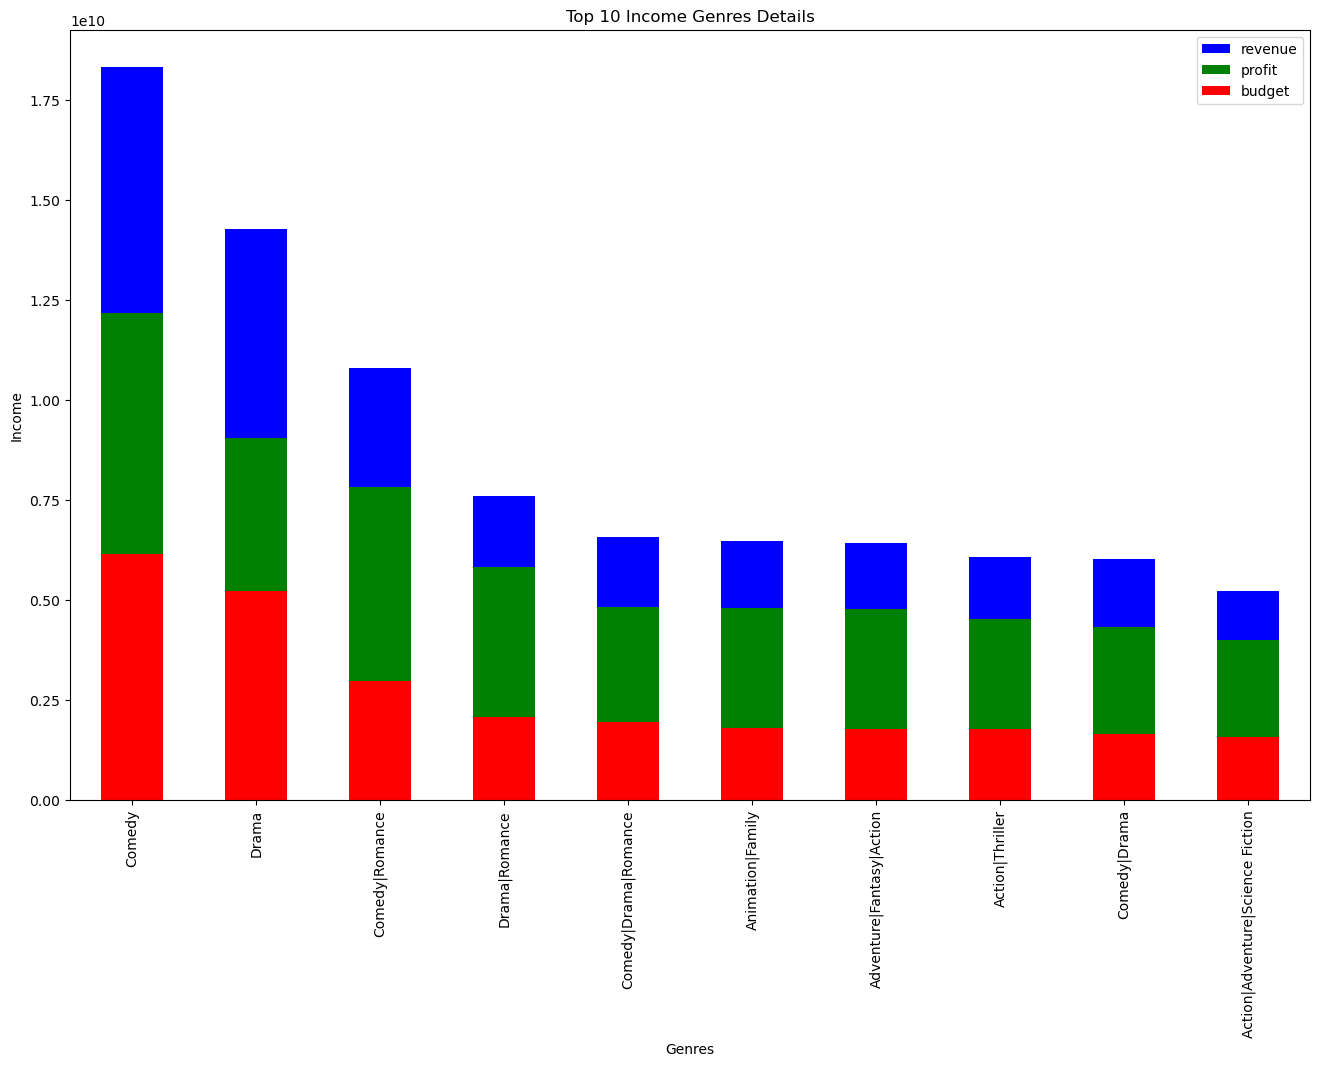

In [51]:
# Calculate total budget
df_budget = df_tmdb.groupby('genres').budget.sum()
# Calculate total revenue
df_revenue = df_tmdb.groupby('genres').revenue.sum()
# Calculate total profit
df_profit = df_tmdb.groupby('genres').profit.sum()

# Draw figure shows those indications
plt.figure(figsize=(16,10))
df_revenue.sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
df_profit.sort_values(ascending=False)[:10].plot(kind='bar', color='Green')
df_budget.sort_values(ascending=False)[:10].plot(kind='bar', color='Red')
plt.ylabel('Income')
plt.xlabel('Genres')
plt.title('Top 10 Income Genres Details')
plt.legend();

<a id='conclusions'></a>
## Conclusions

>So the conclusion is, that if we want to create movies which can give us a profit of more then 25M Dollars then
The average budget of the movies can be arround 51 Million Dollars

>The average runtime of the movies can be arround 112 Minutes

>The Top 10 Genres we should focus on should be Drama, Comedy, Action, Thriller, Adventure, Romance, Crime, Family, Scince Fiction, Fantasy

>The Top 5 cast we should focus on should be Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Bruce Willis

>The average revenue of the movies will be arround 206 Million Dollars

> **The limitations associated with the conclusions are:**

>Lot of budget and revenue data is missing which skewed the results.

>Also, we also lost some of the data in the data cleaning steps where we dont know the revenue and budget of the movie, which has affected our analysis.
